# Introdução

Neste post, vou falar um pouco com implementar/prototipar sua rede neural com o framework Keras, e não falar da parte teórica, isso pode ser assunto para um próximo post. Antes de começar, uma breve introdução.

Keras é um framework que permite a implementação de uma rede neural, de maneira rápida. Para exemplificar existem algumas maneiras de implementar uma, como por exemplo:

- Implementar voce mesmo a matemática (grafos computacionais, otimizações, etc)
- Utilizar alguma biblioteca, com por exemplo, tensorflow

A primeira opção é boa para quem esta aprendendo, mas para quem pretende colocar o projeto em produção, não seria uma boa escolha por alguns motivos, por exemplo já existem projetos prontos como tensorflow e keras =). A segunda é uma escolha viável, porém, em algmas situações, queremos fazer alguns testes, rápidos, que não demandem um controle tão "profundo" do que ocorre debaixo do panos.

Ai entra o Keras, ele é um framework que permite uma prototipação de maneira simples, em uma tradução livre da documentação:"feita para seres humanos, e não maquinas".

# Instalando e importando

Keras roda em cima de backends, hoje existem implementações para Tensorflow, CNTK ou Theano, neste post, vou usar o Tensorflow.

A maneira mais fácil instalar via pip.

```
    pip install tensorflow keras
```

Para importar e ver se funcionou, veja o código abaixo

In [6]:
import tensorflow
import keras

Using TensorFlow backend.


Ele exibe uma mensagem falando que estamos utilizando o backend Tensorflow.

Obs: Se quiser saber mais sobre Tensorflow, mande um email, posso escrever um outro post, ou veja a própria documentação, é um ótimo ponto de partida.

# Dados

Para fins didádicos, vou usar o famoso dataset MNIST, análogo ao Hello World para quem aprende alguma linguagem de programação nova.

Para quem não conhece, o dataset é formado para imagems de 28x28 pixels, contendo digitos escritos a mão por pessoas e seus respectivos labels, digitos de 0 ao 9.

Então vamos carregar o dataset

In [8]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 27s 2us/step


Ao executar o código acima, ele irá fazer o download dos dados,
e devolve os dados como duas tuples do python, a primeira contém
os dados para treinamento, e a segunda os dados para teste.

## Sucinta exploração dos dados

In [12]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Dos resultados acimas, vamos que existem 60000 imagens para treino e 10000 para teste.

Podemos visualizar algumas imagens para entender melhor, da seguinte maneira:

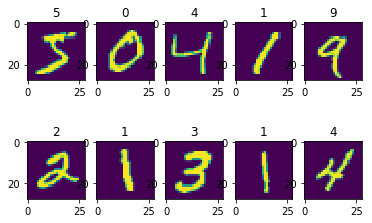

In [19]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i + 1)
    imagem_pixels = x_train[i]
    imagem_label = y_train[i]

    plt.title(imagem_label)
    plt.imshow(imagem_pixels)

plt.show()

Dai vemos algumas imagens e suas classificações.

## Implementação

Até aqui nada de Keras, somente carregamento e alguma visualização dos dados (onde normalmente se gasta mais tempo em qualquer projeto que envolva machine learning), mas agora que temos os dados prontos podemos pensar em uma rede neural básica para implementar.

Vou utilizar uma versão simplificada da exibida nos videos de 
[Redes neurais do 3Blue1Brow](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=1) (que são ótimos por sinal)

O Keras, trabalhar em cima de modelos (models). Modelos são especificações de como sua rede neural sera construída, por exemplo quais camadas vão estar conectadas com quais, os nós, serão totalmente conexos ou não, e por ai vai. Seria como se fosse a "planta" de uma rede neural.

A mais comum, é a Sequencial (Sequential), onde a informação de uma camada é passada para seguinte sequencial, ou seja a camada n para informação a camada n+1. É aquela imagem clássica quando se trata de redes neurais. Veja a imagem abaixo: 

<img src="https://miro.medium.com/max/1400/1*ZB6H4HuF58VcMOWbdpcRxQ.png">